# PREDECTING PRICE OF PRE-OWNED CARS.

## PROBLEM SATATEMENT

### Stome motors is an e-commerce company who act as mediators between parties intrested in selling and uying pre-owned cars.
### For the year 2015-2016, they have eceved data about the seller and car including - Specification, condition of car,
### Seller details, Registraton details, Web advertisement details, Make and model information, Price.
### Strome motors wishes to develop an algorithm to pedict the price of the cars based on various attributes associated with the car.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#Setting dimentions.
sns.set(rc = {'figure.figsize':(11.7,8.27)})
import os
os.chdir('E:')

In [2]:
#importing data
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [5]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [6]:
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [7]:
print(cars.columns)
#dropping unwanted columns
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')


In [8]:
cars.drop_duplicates(keep='first',inplace=True)

In [9]:
#data cleaning

In [10]:
print(cars.isna().sum())

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64


<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

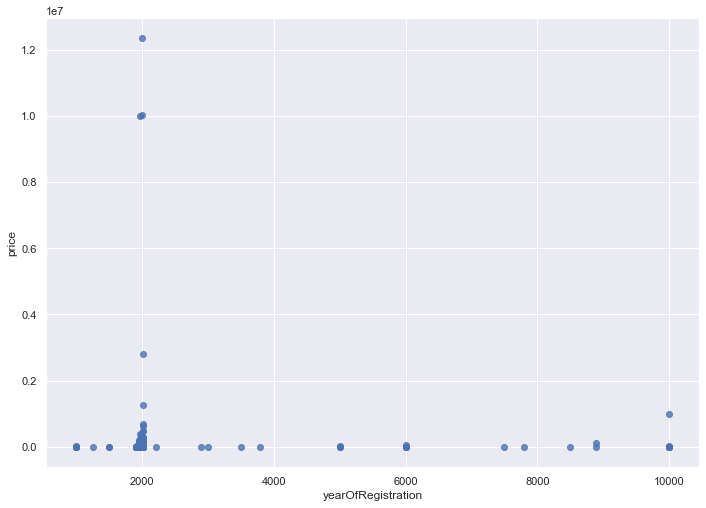

In [11]:
#variable year of regestration
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration']>2018)
sum(cars['yearOfRegistration']<1950)
sns.regplot(x='yearOfRegistration', y='price',scatter=True,fit_reg=False,data=cars)

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1748

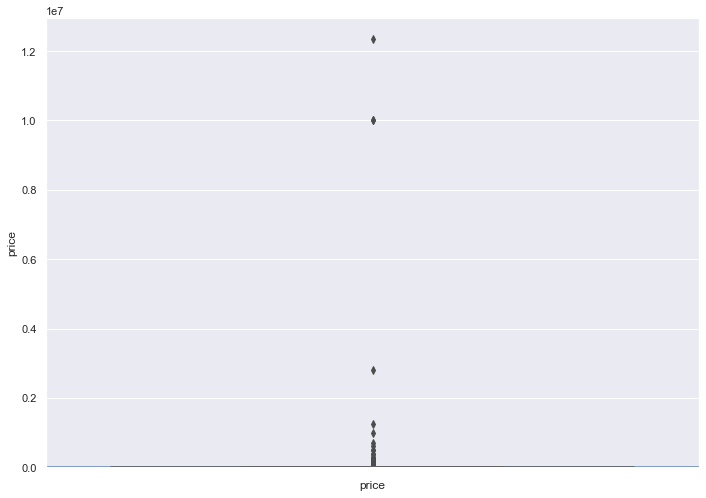

In [12]:
#variable price
price_count = cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price']>150000)
sum(cars['price']<100)


C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5565

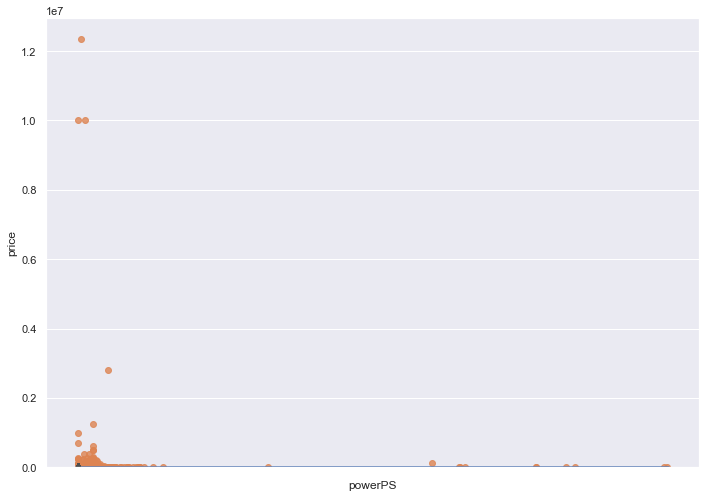

In [13]:
#variable power ps
power_count = cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS', y='price',scatter=True,fit_reg=False,data=cars)
sum(cars['powerPS']>500)
sum(cars['powerPS']<10)

In [14]:
#working range of data
cars = cars[(cars.yearOfRegistration <= 2018)&(cars.yearOfRegistration >= 1950)&(cars.price <= 150000)&(cars.price >= 100)&(cars.powerPS >= 10)&(cars.powerPS <= 500)]


In [15]:
cars['monthOfRegistration']/=12
cars['Age'] = (2018-cars['yearOfRegistration']+cars['monthOfRegistration'])
cars['Age'] = round(cars['Age'],2)
cars['Age'].describe()

cars = cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

In [16]:
#visualization

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Age'>

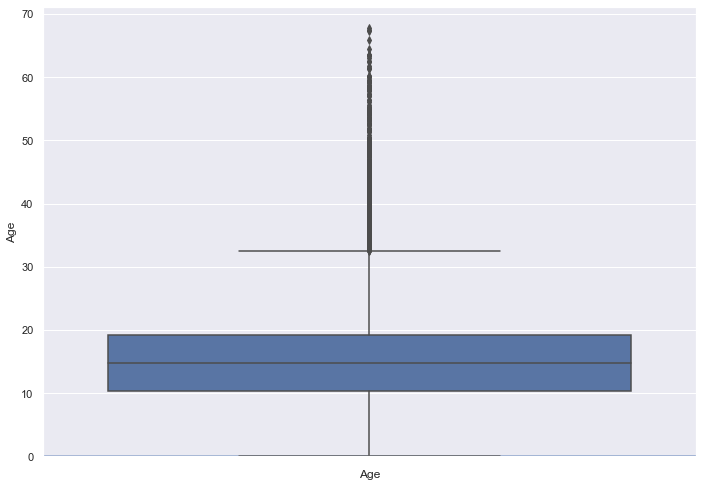

In [17]:
#age
sns.distplot(cars['Age'])
sns.boxplot(y=cars['Age'])

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='price'>

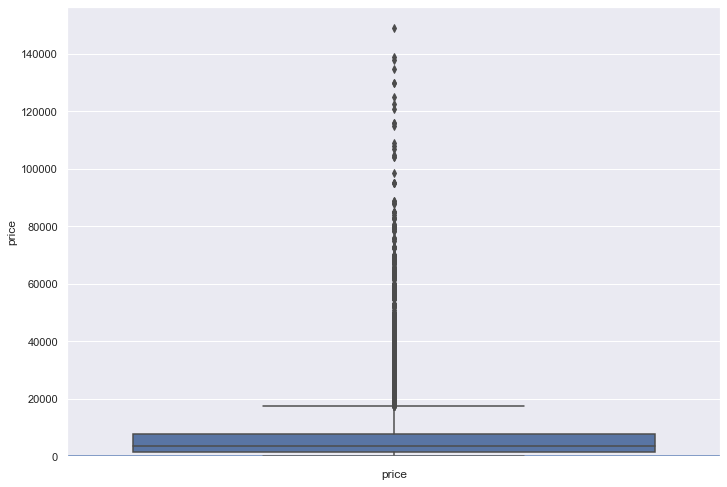

In [18]:
#price
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='powerPS'>

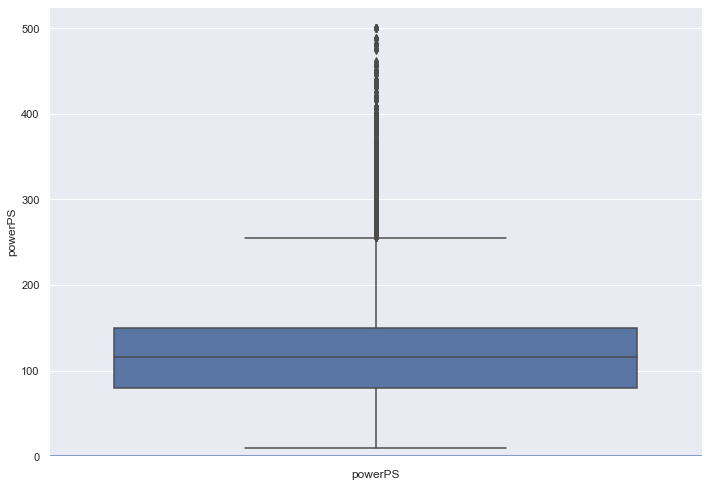

In [19]:
#powerPS
sns.distplot(cars['powerPS'])
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

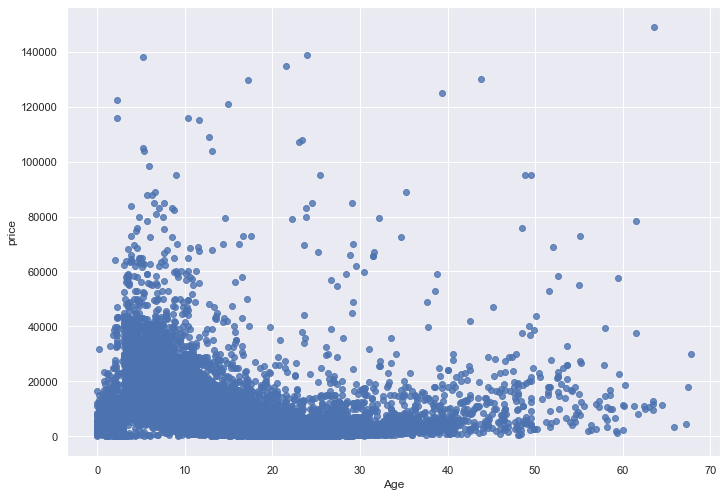

In [20]:
#Age vs price
sns.regplot(x='Age',y="price",data=cars,scatter=True,fit_reg=False)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

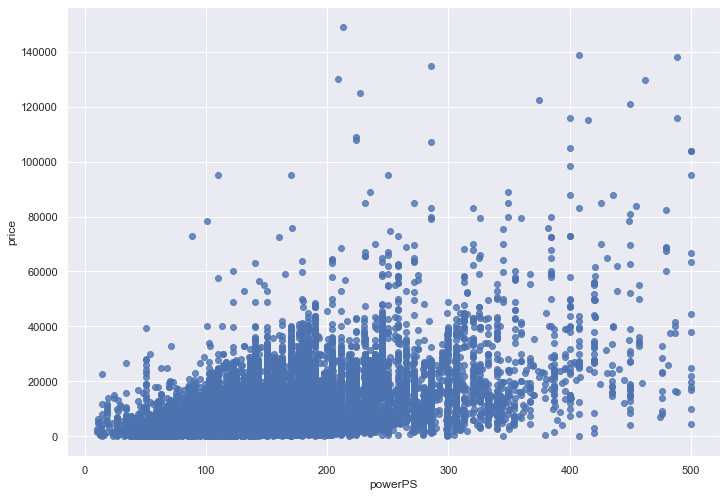

In [21]:
#powerps vs price
sns.regplot(x='powerPS',y="price",data=cars,scatter=True,fit_reg=False)

<AxesSubplot:xlabel='seller', ylabel='count'>

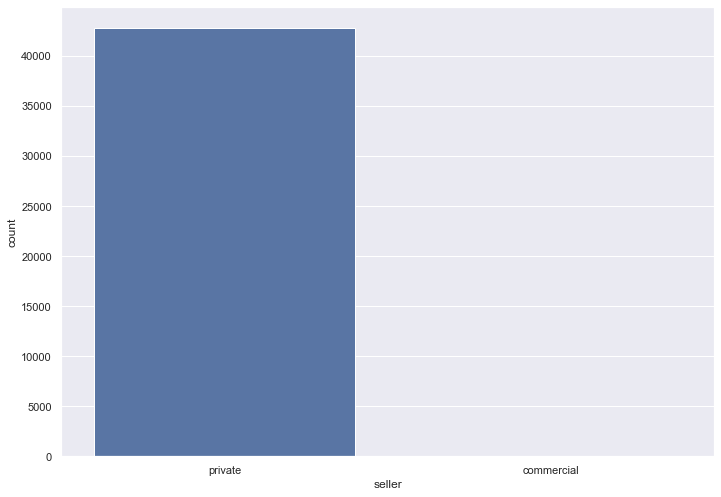

In [22]:
#variable sellar
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x='seller',data=cars)

<AxesSubplot:xlabel='offerType', ylabel='count'>

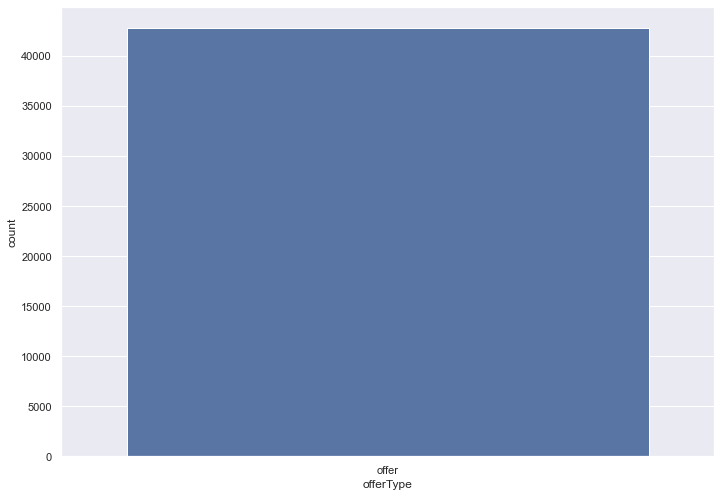

In [23]:
#variable offertype
cars['offerType'].value_counts()
sns.countplot(x='offerType',data=cars)

<AxesSubplot:xlabel='abtest', ylabel='price'>

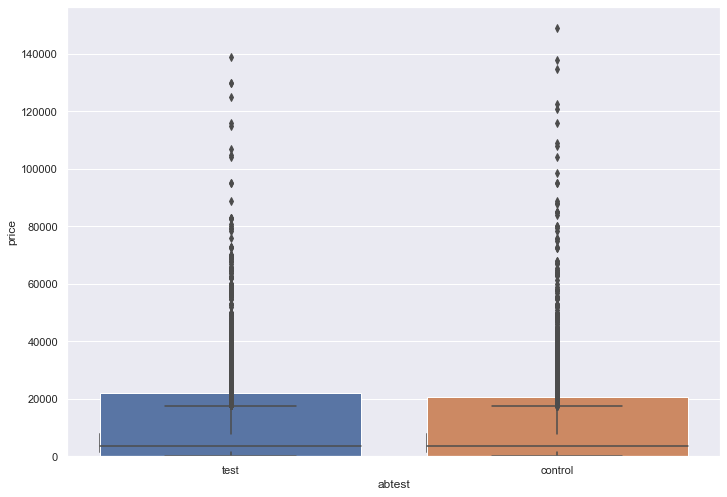

In [24]:
#variable abtest
cars['abtest'].value_counts()
sns.countplot(x='abtest',data=cars)
sns.boxplot(x='abtest',y='price',data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

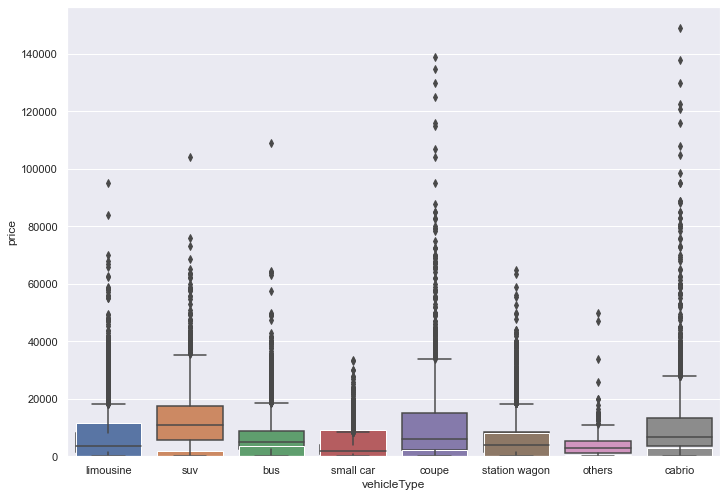

In [25]:
#variable vehicaltype
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x='vehicleType',data=cars)
sns.boxplot(x='vehicleType',y='price',data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

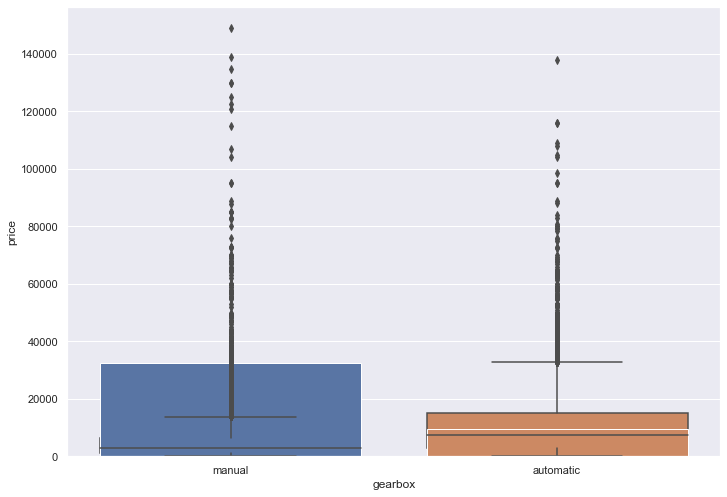

In [26]:
#variable gearbox
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x='gearbox',data=cars)
sns.boxplot(x='gearbox',y='price',data=cars)

<AxesSubplot:xlabel='model', ylabel='price'>

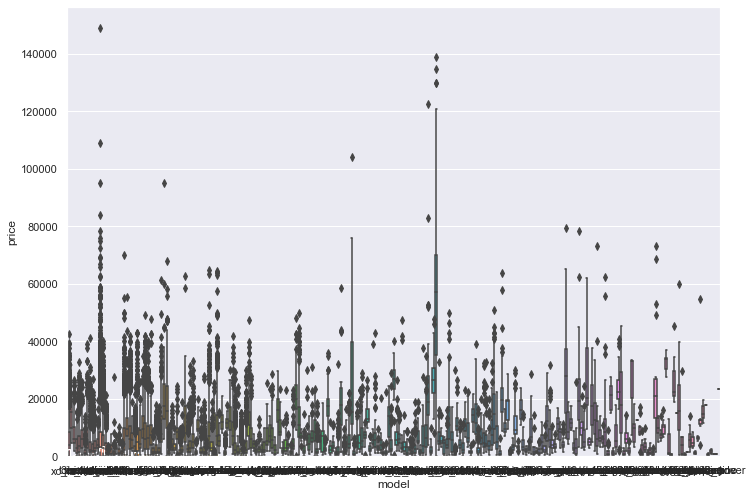

In [27]:
#variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x='model',data=cars)
sns.boxplot(x='model',y='price',data=cars)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

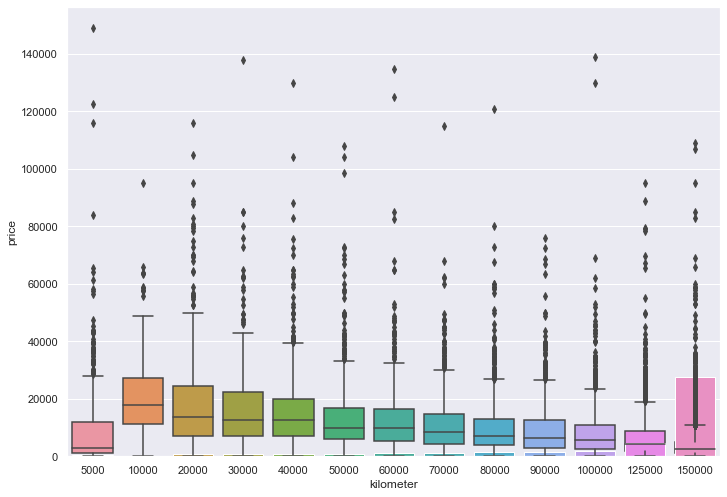

In [28]:
#variable km
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.countplot(x='kilometer',data=cars)
sns.boxplot(x='kilometer',y='price',data=cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

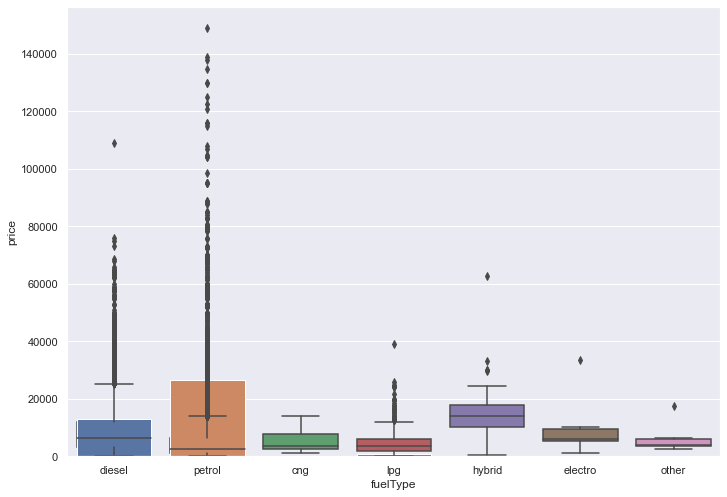

In [29]:
#varibale fueltype
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x='fuelType',data=cars)
sns.boxplot(x='fuelType',y='price',data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

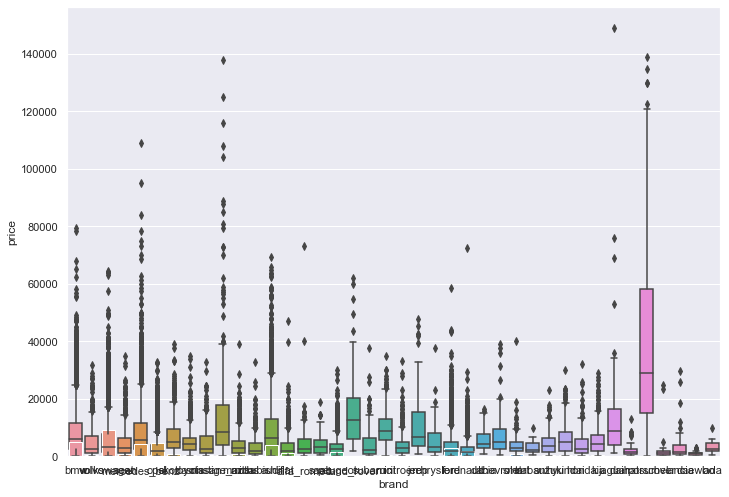

In [30]:
#variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x='brand',data=cars)
sns.boxplot(x='brand',y='price',data=cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

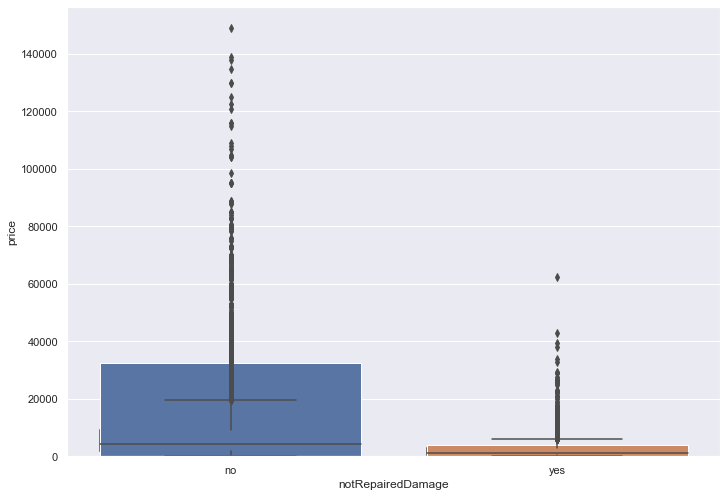

In [31]:
#variable notRepairedDamage
#if yes damaned but not rectified
#if no damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x='notRepairedDamage',data=cars)
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

In [32]:
#remove insignificant columns
col = ['seller','offerType','abtest']
cars = cars.drop(columns=col,axis=1)
cars_copy = cars.copy()

In [33]:
#correlation
cars_select1 = cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [34]:
#we are going to built a linear regresion and random forestmode on two sets of data
#1.omitting rows with missing values
#2.imputting the missing values

In [35]:
#omitting missing values

In [37]:
cars_omit = cars.dropna(axis=0)

In [38]:
#converting categorical variables into dummy value
cars_omit = pd.get_dummies(cars_omit,drop_first=True)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [40]:
#model building with omitting data

In [41]:

#seprating input and output features
x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

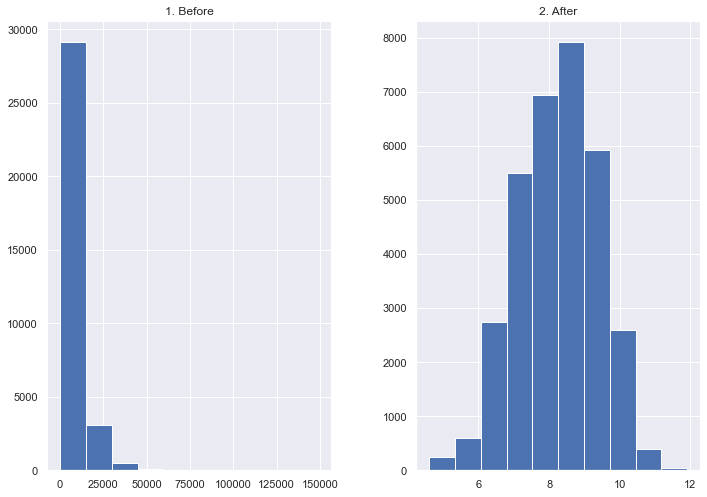

In [42]:
#placing the variable price
prices = pd.DataFrame({'1. Before':y1,"2. After":np.log(y1)})
prices.hist()

In [43]:
#transforming price as a natural logerithm value
y1 = np.log(y1)

In [44]:
#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [45]:
#finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [46]:
#repeating the same value till length of the test data 
base_pred = np.repeat(base_pred,len(y_test))

In [47]:
#finding RMSC VALUE (ROOT MEANS SQUARE ERROR)
#it computes the diff between the test value and predicted value sqaures them and devide it to the number of observation
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1274483657478247


In [48]:
#linear regretion with omitting data
lgr = LinearRegression(fit_intercept=True)

In [49]:
#model
mode_lin1 = lgr.fit(X_train, y_train)

In [50]:
#predicting model on test set
cars_prediction_lin1 = lgr.predict(X_test)

In [51]:
#computing MSE AND RMSE
lin_mse1 = mean_squared_error(y_test,cars_prediction_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513815


In [52]:
#R squarred value
re_lin_test1 = mode_lin1.score(X_test, y_test)
re_lin_train1 = mode_lin1.score(X_train, y_train)
print(re_lin_test1,re_lin_train1)

0.7658615091649266 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

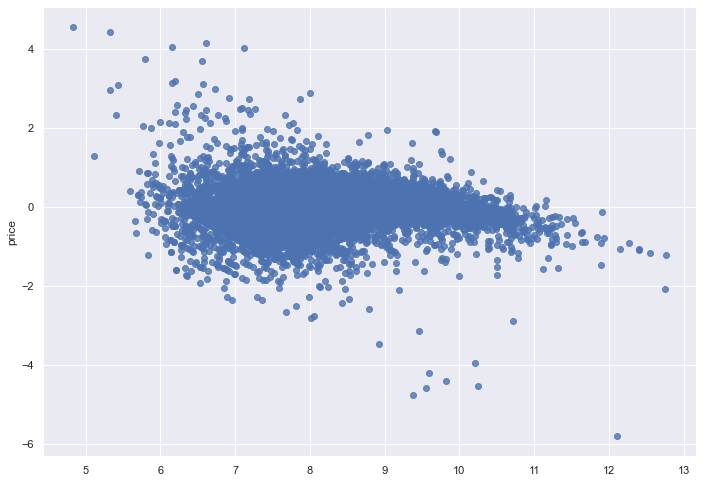

In [53]:
#Regression diagonal residual plot analysis
residuals1 = y_test-cars_prediction_lin1
sns.regplot(x = cars_prediction_lin1,y=residuals1,scatter=True,fit_reg=False,data = cars)
residuals1.describe()

In [54]:
#RANDOM FOREST MODEL WITH OMITTING DATA
#model parameters
rf = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [55]:
#model
model_rf1 = rf.fit(X_train, y_train)


In [56]:
#predicting model on test data
cars_predictions_rf1 = rf.predict(X_test)

In [57]:
#computing mse and rmse
rf_mse1 = mean_squared_error(y_test,cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [58]:
#R sqarded value
re_rf_test1 = model_rf1.score(X_test, y_test)
re_rf_train1 = model_rf1.score(X_train, y_train)
print(re_rf_test1,re_rf_train1)

0.8504018147750623 0.9202494705146291


In [59]:
#model building with imputed data

In [60]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) if x.dtype == 'float' else x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [61]:
#converting categorical variable to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [62]:
#model building with imputed data
#seprating input and output features
x2 = cars_imputed.drop(['price'],axis='columns',inplace=False)
y2 = cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

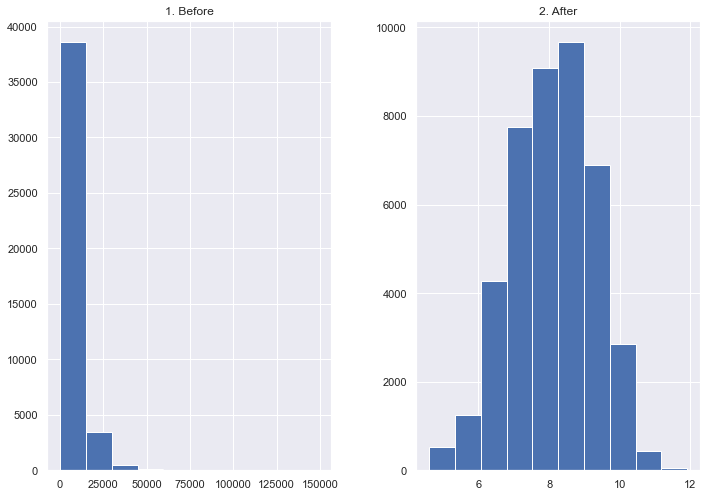

In [63]:
#ploting the variable prise
prices = pd.DataFrame({'1. Before':y2,"2. After":np.log(y2)})
prices.hist()

In [64]:
#transforming price as a natural logerithm value
y2 = np.log(y2)

In [65]:
#splitting the data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.3,random_state=3)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [66]:
#baseline model for the omiting data
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [67]:
#repeating the same value till length of the test data 
base_pred = np.repeat(base_pred,len(y_test1))

In [68]:
#finding RMSC VALUE (ROOT MEANS SQUARE ERROR)

In [69]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1,base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


In [70]:
#linear regretion with imputed data
lgr2 = LinearRegression(fit_intercept=True)

In [71]:
#model
mode_lin2 = lgr2.fit(X_train1, y_train1)

In [72]:
#predicting model on test set
cars_prediction_lin2 = lgr2.predict(X_test1)

In [73]:
#computing MSE AND RMSE
lin_mse2 = mean_squared_error(y_test1,cars_prediction_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231307


In [74]:
#R squarred value
re_lin_test2 = mode_lin2.score(X_test1, y_test1)
re_lin_train2 = mode_lin2.score(X_train1, y_train1)
print(re_lin_test2,re_lin_train2)


0.7023339008631175 0.7071658736894363


In [75]:
#RANDOM FOREST MODEL WITH OMITTING DATA
#model parameters
rf2 = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [76]:
#model
model_rf2 = rf2.fit(X_train1, y_train1)

In [77]:
#predicting model on test data
cars_predictions_rf2 = rf2.predict(X_test1)

In [78]:
#computing mse and rmse
rf_mse2 = mean_squared_error(y_test1,cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [79]:
#R sqarded value
re_rf_test2 = model_rf2.score(X_test1, y_test1)
re_rf_train2 = model_rf2.score(X_train1, y_train1)
print(re_rf_test2,re_rf_train2)

0.8269964521311131 0.9024289431669166
